In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Checking for Null values
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [4]:
# Drooping the Null values
data = data.dropna()

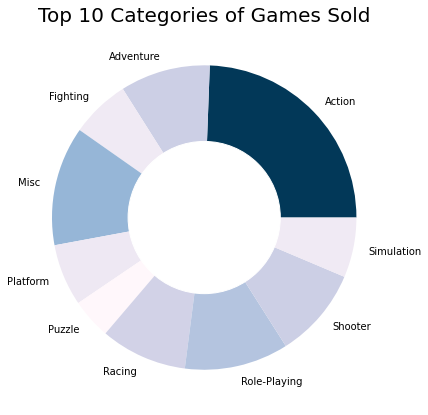

In [5]:
# Visualizing Top 10: Game Category
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

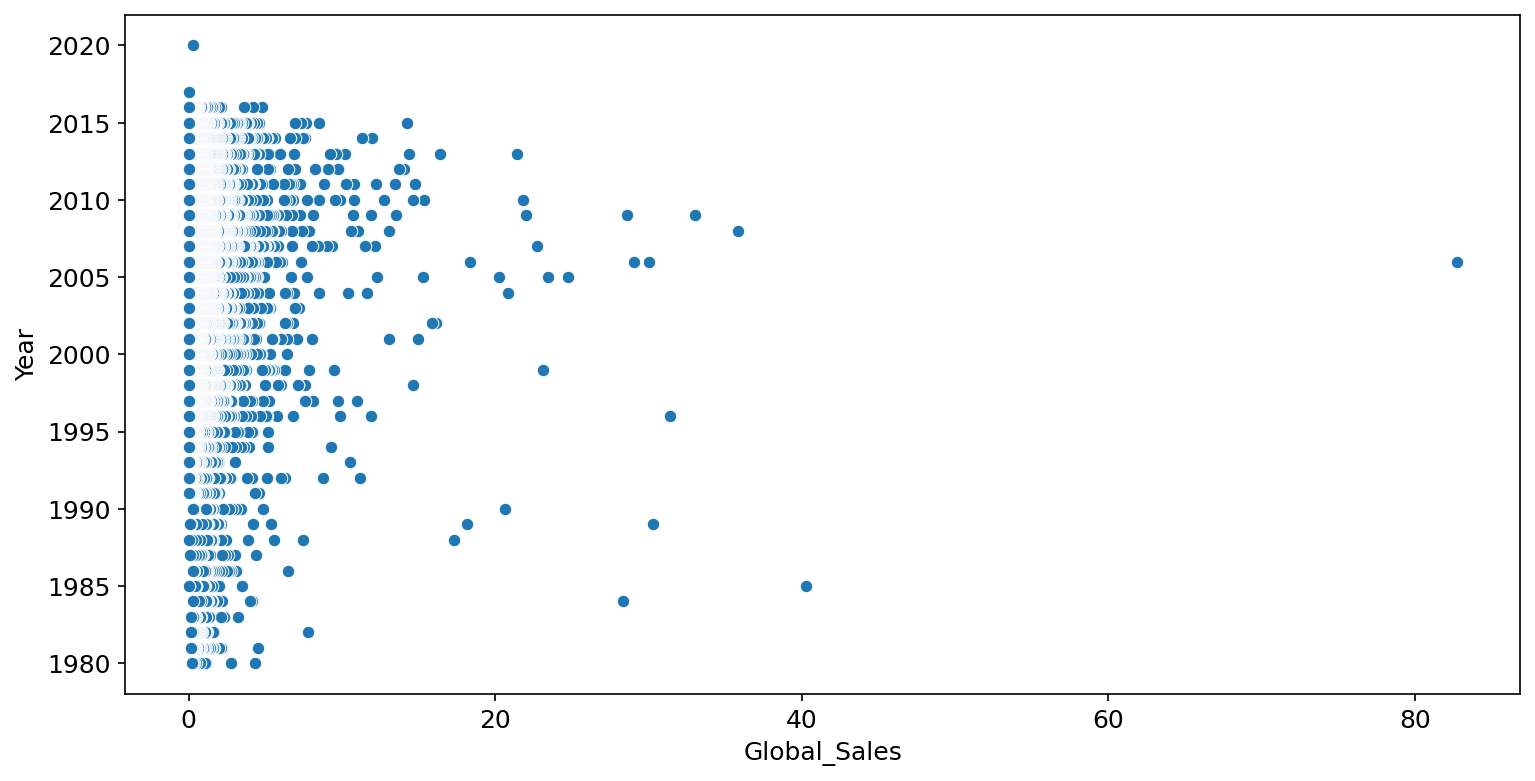

In [6]:
# Visualizing Year and Global Sales
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(data=data, y="Year", x="Global_Sales")
plt.show()

Scatterplot explains that most game titles made global sales of below roughly $15 million mark, with some exceptionally good ones going beyond that. 

Also there is some outliers, with one game in particular released in 2006 making a breakthrough.

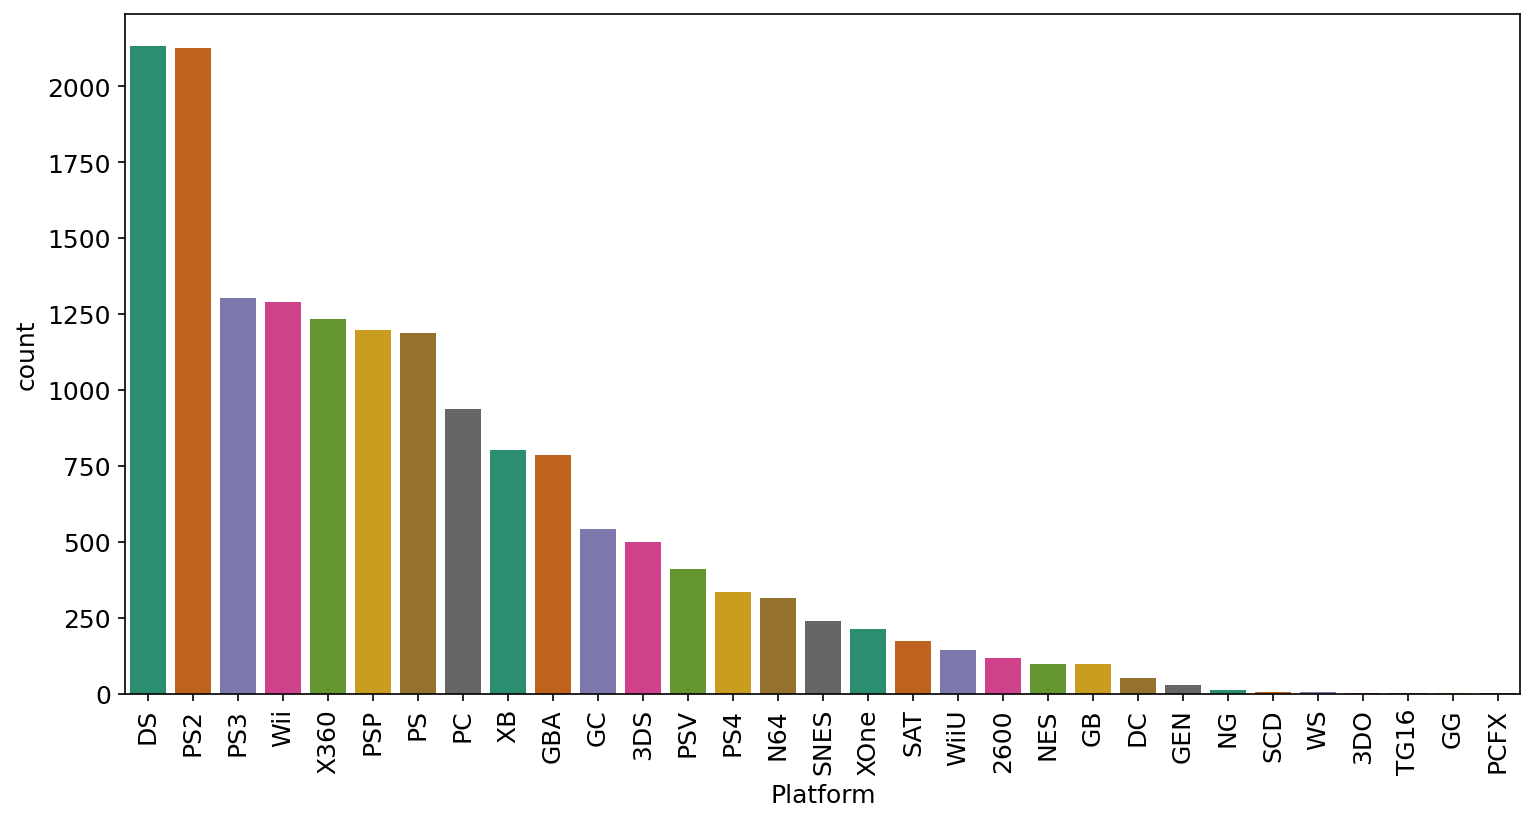

In [7]:
# Total Count of Games for each Platform
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=data,
              x="Platform",
              order = data["Platform"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

Nintendo DS and the PlayStation 2 have the most game in their platform.

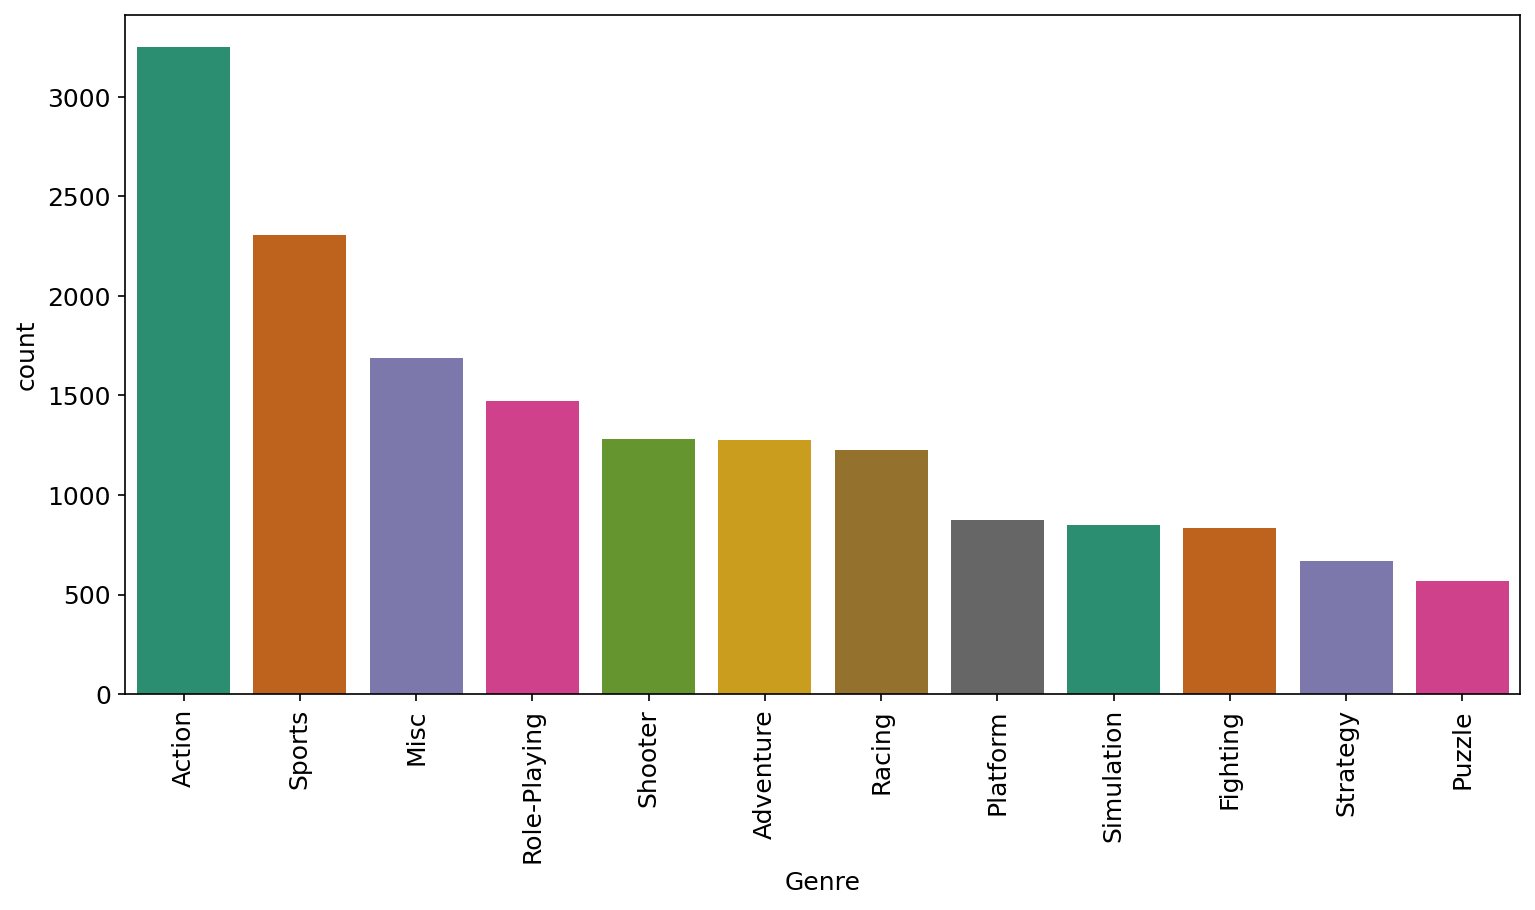

In [8]:
# Total Count of Games for each Genre
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=data,
              x="Genre",
              order = data["Genre"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

Genre: "Action" seems to be the one in which most game are released, following by Sports, Misc and Role-Playing.

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


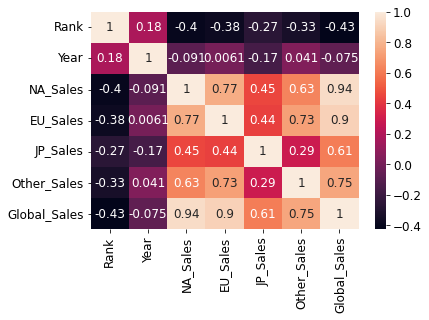

In [9]:
# Checking for correlation
print(data.corr())

# Heat map
sns.heatmap(data.corr(), annot=True)
plt.show()

Heatmap depicts that all the sales columns are correlated to one another and no significant correlation between the other columns.

In [10]:
# Assining variables
var = ["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"] 
x = data[var]
y = data["Global_Sales"]

In [11]:
# Data splitting
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Training the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

# Predicting the sales
predictions = model.predict(xtest)

In [13]:
# Unbiased Performance measure

# R-squared
print("R-squared value for the model is", model.score(xtest, ytest))

R-squared value for the model is 0.9999933287153024
